In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('flights_clean.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,3,4,20:03,19:55,22:11,22:25,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,2008,1,3,4,07:54,07:35,10:02,10:00,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,2008,1,3,4,06:28,06:20,08:04,07:50,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,2008,1,3,4,19:40,19:15,21:21,21:10,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


### Nivell 1

- Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

**quines variables agafem para classificar els diferents vols?**
+  agafem variables numeriques i variables categoricas
+ variables numeriques, totes aquelles que potencialment podem tenir sentit

    + ArrDelay, DepDelay, ActualElapsedTime
    + diadel mes, dia de la setmana
    
+ variables categoriques:

    + UniqueCarrier code
    + ...

In [3]:
X = df[['DayofMonth','DayOfWeek','UniqueCarrier','FlightNum','TailNum','ActualElapsedTime','ArrDelay','DepDelay','Origin','Dest','Distance']]

In [5]:
X.head()

,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,3,4,WN,335,N712SW,128.0,-14.0,8.0,IAD,TPA,810
1,3,4,WN,3231,N772SW,128.0,2.0,19.0,IAD,TPA,810
2,3,4,WN,448,N428WN,96.0,14.0,8.0,IND,BWI,515
3,3,4,WN,3920,N464WN,90.0,34.0,34.0,IND,BWI,515
4,3,4,WN,378,N726SW,101.0,11.0,25.0,IND,JAX,688


In [22]:
df_carrier= pd.get_dummies(X['UniqueCarrier'], prefix = None, drop_first=True)
df_carrier.head()

,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
numerical_features= df[['DayofMonth','DayOfWeek','ActualElapsedTime','ArrDelay','DepDelay','Distance']]

In [39]:
df_final = pd.concat([numerical_features,df_carrier],axis=1)
df_final.head()

,DayofMonth,DayOfWeek,ActualElapsedTime,ArrDelay,DepDelay,Distance,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,3,4,128.0,-14.0,8.0,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,4,128.0,2.0,19.0,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,4,96.0,14.0,8.0,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,4,90.0,34.0,34.0,515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,4,101.0,11.0,25.0,688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# anem a aplicar un PCA per quedarnos amb 3 components principals per veure com queden agrupats

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_final)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

principalDf.head()

,pc1,pc2
0,44.283302,-65.488028
1,44.230194,-46.322956
2,-252.506424,-45.583354
3,-253.295468,-13.682890
4,-80.144833,-36.782916


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

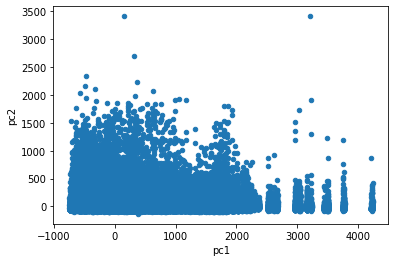

In [55]:
principalDf.plot(x='pc1',y='pc2',kind='scatter')

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df_scaled = pd.DataFrame(scaler.fit_transform(numerical_features),columns=numerical_features.columns)

In [ ]:
df_scaled.head()

In [ ]:
df_origin= pd.get_dummies(df['Origin'], prefix = None, drop_first=False)
df_origin.head()

In [ ]:
df_dest= pd.get_dummies(df['Dest'], prefix = None, drop_first=False)
df_dest.head()

In [ ]:
df_final = pd.concat([df_scaled,df[['DayofMonth','DayOfWeek']],df_carrier,df_origin,df_dest],axis=1)

In [ ]:
df_final.tail()

In [ ]:
df_final.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_final)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])

principalDf.head()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
n_clusters = np.arange(5,65,10)
inercias = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300}
for cluster in n_clusters:    
    knn = KMeans(n_clusters=cluster,**kmeans_kwargs)
    knn.fit(df_scaled)
    err = knn.inertia_
    print(cluster,err)
    inercias.append(err)


In [ ]:
plt.scatter(n_clusters,inercias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

'The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    How close the data point is to other points in the cluster
    How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. 
'

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
